# Automatic Pavement Crack Detection

Importing the required modules for the project

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import load_model

Assigning the paths for training the model

In [2]:
train_dir = test_dir = val_dir = 'Data/'

# Functions for processing images and creating data

In [3]:
def process_image(image):
    ret,bi_inv = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
    #plt.imshow(bi_inv, 'gray')
    return bi_inv, image

def create_data(tdir_, type_, frm, to, t_data):
    colored_data=[]
    bi_inv_data=[]
    print('Working On '+t_data+' Data : '+type_ +'\n')
    rng = ["%05d" % x for x in range(frm, to+1)]
    for i in rng:
        dir_ =tdir_+type_+'/'+i+'.jpg'
        image = cv2.imread(dir_, 0)
        bi_inv, colored_img = process_image(image)
        colored_data.append(colored_img)
        bi_inv_data.append(bi_inv)   
        
    print('Images Processed from '+rng[0]+' to '+rng[len(rng)-1]+'\n')    
    return colored_data, bi_inv_data

# Training data over 3000 positive and negative images

In [4]:
train_data_colr= []
train_labels=[]
train_data_inv = []

train_data_colr_pos, train_data_inv_pos=  create_data(train_dir, 'Positive', 1, 1500, 'Training')

for i in range(0, len(train_data_colr_pos)):
    train_data_colr.append(train_data_colr_pos[i])
    train_data_inv.append(train_data_inv_pos[i])
    train_labels.append(1)

train_data_colr_neg, train_data_inv_neg=  create_data(train_dir, 'Negative', 1, 1500, 'Training')

for i in range(0, len(train_data_colr_neg)):
    train_data_colr.append(train_data_colr_neg[i])
    train_data_inv.append(train_data_inv_neg[i])
    train_labels.append(0)
    

final_train_colr = np.array(train_data_colr).reshape(((len(train_data_colr), 227, 227, 1)))
final_train_inv = np.array(train_data_inv).reshape(((len(train_data_inv), 227, 227, 1)))
print('Shape of Training Data : '+str(final_train_colr.shape))

Working On Training Data : Positive

Images Processed from 00001 to 01500

Working On Training Data : Negative

Images Processed from 00001 to 01500

Shape of Training Data : (3000, 227, 227, 1)


#  Validating the data

In [5]:
val_data_colr= []
val_labels=[]
val_data_inv = []

val_data_colr_pos, val_data_inv_pos=  create_data(val_dir, 'positive', 1701, 2000, 'Validation')


for i in range(0, len(val_data_colr_pos)):
    val_data_colr.append(val_data_colr_pos[i])
    val_data_inv.append(val_data_inv_pos[i])
    val_labels.append(1)

val_data_colr_neg, val_data_inv_neg=  create_data(val_dir, 'negative', 1701, 2000, 'Validation')

for i in range(0, len(val_data_colr_neg)):
    val_data_colr.append(val_data_colr_neg[i])
    val_data_inv.append(val_data_inv_neg[i])
    val_labels.append(0)
    
final_val_colr = np.array(val_data_colr).reshape(((len(val_data_colr), 227, 227, 1)))    
final_val_inv = np.array(val_data_inv).reshape(((len(val_data_inv), 227, 227, 1)))   

print('Shape of Validation Data : '+str(final_val_colr.shape))

Working On Validation Data : positive

Images Processed from 01701 to 02000

Working On Validation Data : negative

Images Processed from 01701 to 02000

Shape of Validation Data : (600, 227, 227, 1)


# Testing the data

In [6]:
test_data_colr= []
test_labels=[]
test_data_inv = []

test_data_colr_pos, test_data_inv_pos=  create_data(test_dir, 'positive', 1501, 1700, 'Testing')


for i in range(0, len(test_data_colr_pos)):
    test_data_colr.append(test_data_colr_pos[i])
    test_data_inv.append(test_data_inv_pos[i])
    test_labels.append(1)

test_data_colr_neg, test_data_inv_neg=  create_data(test_dir, 'negative', 1501, 1700, 'Testing')

for i in range(0, len(test_data_colr_neg)):
    test_data_colr.append(test_data_colr_neg[i])
    test_data_inv.append(test_data_inv_neg[i])
    test_labels.append(0)
    
final_test_colr = np.array(test_data_colr).reshape(((len(test_data_colr), 227, 227, 1)))    
final_test_inv = np.array(test_data_inv).reshape(((len(test_data_inv), 227, 227, 1)))   
print('Shape of Testing Data : '+str(final_test_colr.shape))

Working On Testing Data : positive

Images Processed from 01501 to 01700

Working On Testing Data : negative

Images Processed from 01501 to 01700

Shape of Testing Data : (400, 227, 227, 1)


In [7]:
input_shape = (227, 227, 1)
Wh = 3
Ww = 3

model = Sequential()
model.add(Conv2D(input_shape=input_shape , data_format="channels_last", kernel_size=(Wh,Ww), filters=32, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

#  Training the algorithm

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

train_labels=np.array(train_labels)
val_labels=np.array(val_labels)
model.fit(final_train_inv,train_labels, batch_size=250, epochs=2, verbose=1, 
          validation_data=(final_val_inv, val_labels))

Epoch 1/2
12/12 [==============================] - 94s 7s/step - loss: 16.7484 - accuracy: 0.6520 - val_loss: 0.5436 - val_accuracy: 0.8167
Epoch 2/2
12/12 [==============================] - 80s 7s/step - loss: 0.5613 - accuracy: 0.7717 - val_loss: 0.7461 - val_accuracy: 0.8250


# Accuracy and loss

In [9]:
score=model.evaluate(final_test_inv, np.array(test_labels))
print('Final Accuracy : ', score[1]*100, "%" )
print('Final Loss : ', score[0])

13/13 [==============================] - 2s 188ms/step - loss: 0.7869 - accuracy: 0.8025
Final Accuracy :  80.25000095367432 %
Final Loss :  0.7869179248809814


# Image Predictor (Functions)

In [10]:
def predict_image_util(final_pred_inv):
    img_test = (np.array(final_pred_inv[0]).reshape((1, 227, 227, 1)))  
    raw_predicted_label = model.predict(img_test, batch_size=None, verbose=0, steps=None)[0][0]
    
    predicted_label=1;    
    if(raw_predicted_label<0.8):
        predicted_label=0
        
    predicted_label_str='Crack Detected'    
    if(predicted_label==0):
        predicted_label_str='No Crack'
        
    print('Predicted Value : '+str(raw_predicted_label))
    print('\nPredicted Label : '+predicted_label_str)  

In [11]:
from_data_dir = 'Data/'  #Directory

def predict_image2(type_, num):
    
    pred_data_colr_, pred_data_inv_ = create_data(from_data_dir, type_, num, num+1, 'Predictable')
    plt.imshow(pred_data_colr_[0])
    pred_data_colr =[]
    pred_data_inv = []
    
    pred_data_inv.append(pred_data_inv_[0])
    pred_data_colr.append(pred_data_colr_[0])
    
    final_pred_colr = np.array(pred_data_colr).reshape(((len(pred_data_colr), 227, 227, 1)))  
    final_pred_inv = np.array(pred_data_inv).reshape(((len(pred_data_inv), 227, 227, 1)))
    predict_image_util(final_pred_inv)

# Testing the algorithm 

Working On Predictable Data : Negative

Images Processed from 03001 to 03002

Predicted Value : 0.4785641

Predicted Label : No Crack


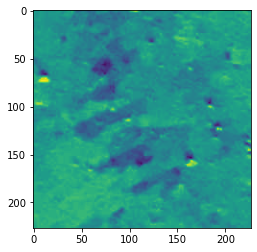

In [12]:
predict_image2('Negative', 3001) 

Working On Predictable Data : Positive

Images Processed from 01901 to 01902

Predicted Value : 1.0

Predicted Label : Crack Detected


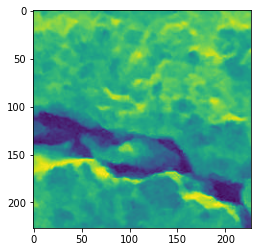

In [13]:
predict_image2('Positive', 1901)    

Working On Predictable Data : Positive

Images Processed from 01111 to 01112

Predicted Value : 0.99999976

Predicted Label : Crack Detected


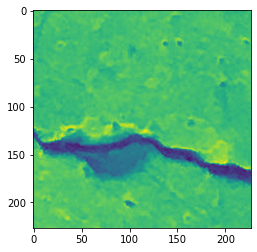

In [14]:
predict_image2('Positive', 1111) 

Working On Predictable Data : Positive

Images Processed from 09991 to 09992

Predicted Value : 0.9994688

Predicted Label : Crack Detected


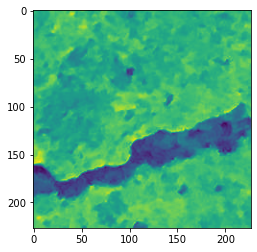

In [15]:
predict_image2('Positive', 9991) 